In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from src.quat_class import quat_class
from src.util import plot_tools, load_tools, process_tools

# Load data

In [2]:
T = 5
# p_raw, q_raw, t_raw, dt = load_tools.load_npy(duration=T)
p_raw, q_raw, t_raw, dt = load_tools.load_clfd_dataset(task_id=2, num_traj=5, sub_sample=1, duration=T)
# p_raw, q_raw, t_raw, dt= load_tools.load_demo_dataset()
T = t_raw[0][-1] - t_raw[0][0]

# Process data

In [3]:
p_in_list, q_in_list, t_in_list   = process_tools.pre_process(p_raw, q_raw, t_raw, opt= "savgol")
p_out_list, q_out_list            = process_tools.compute_output(p_in_list, q_in_list, t_in_list)
p_init, q_init_list, p_att, q_att = process_tools.extract_state(p_in_list, q_in_list)
p_in, q_in, p_out, q_out          = process_tools.rollout_list(p_in_list, q_in_list, p_out_list, q_out_list)

# Begin learning

In [4]:
quat_obj = quat_class(q_in, q_out, q_att, dt, K_init=4)
quat_obj.begin()

Current ori_element 0
has number 1326
Current ori_element 1
has number 1273
Current ori_element 2
has number 1085
Current ori_element 3
has number 1316
A_norm_ori 0.22340438781808158
A_norm_ori 0.22354043124472753
A_norm_ori 0.2236718584290282
A_norm_ori 0.22606442973812121
A_norm_ori 0.22343890420636867
A_norm_ori 0.2235749739771725
A_norm_ori 0.2237063644455778
A_norm_ori 0.22609857241835252


# Evaluate

Converged within max iteration


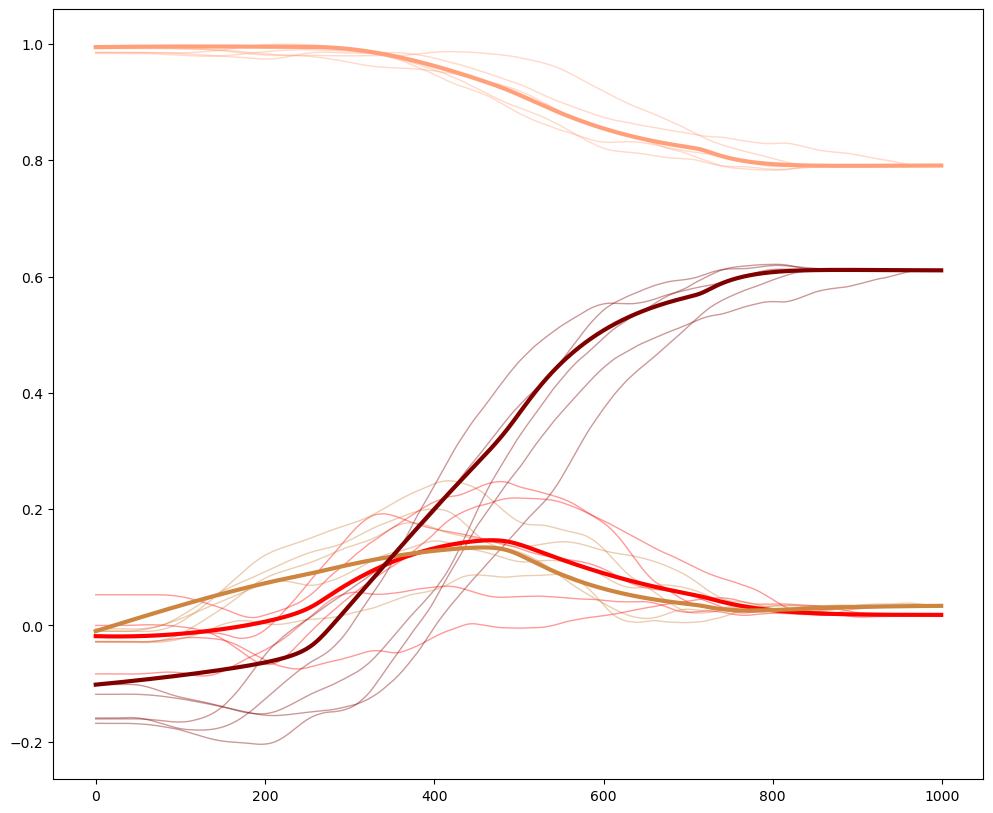

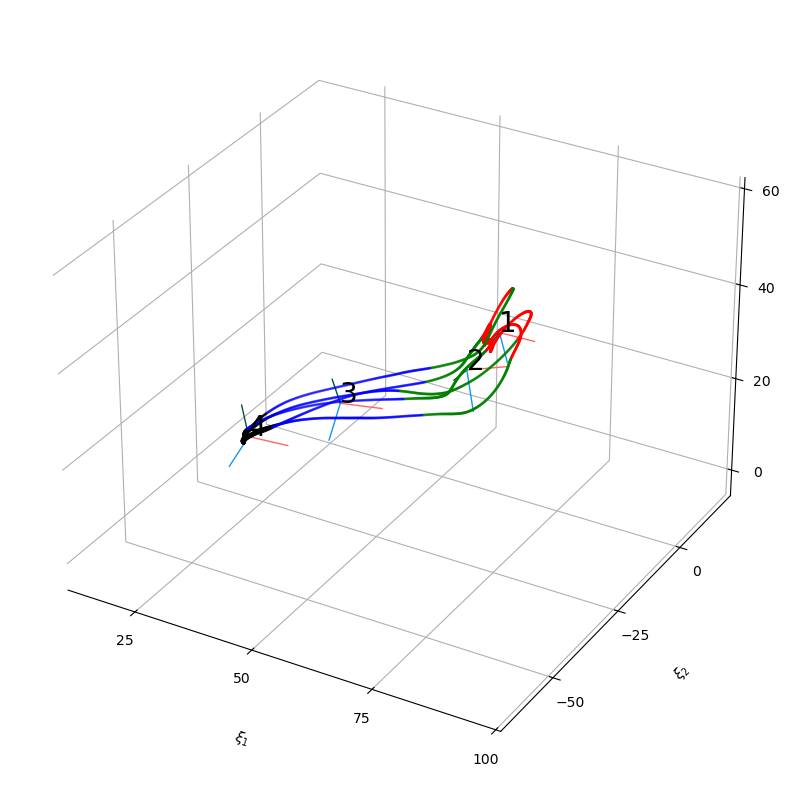

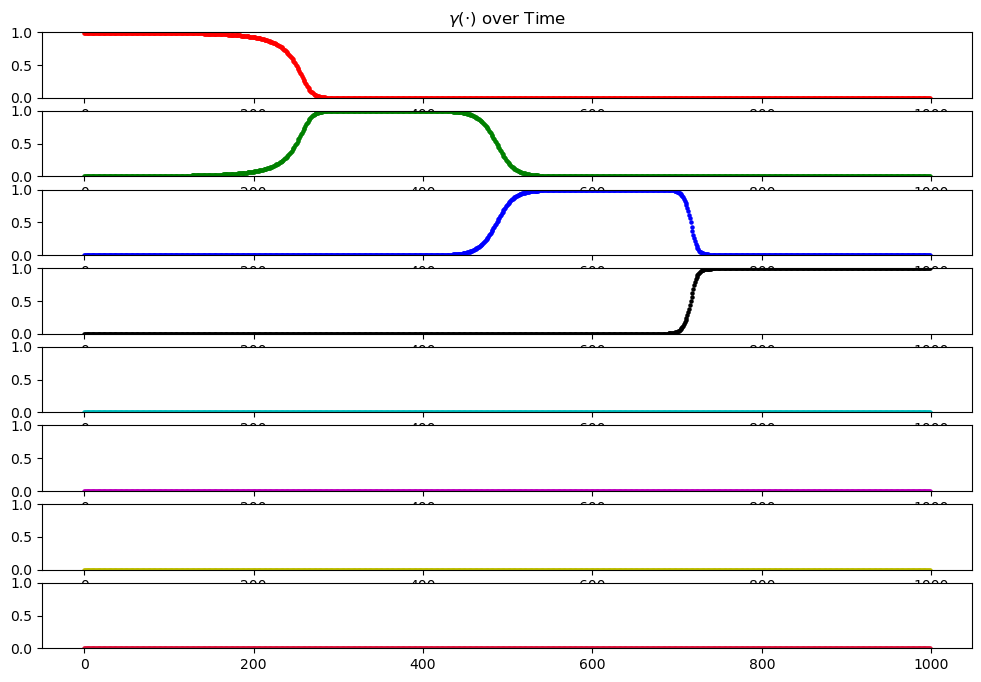

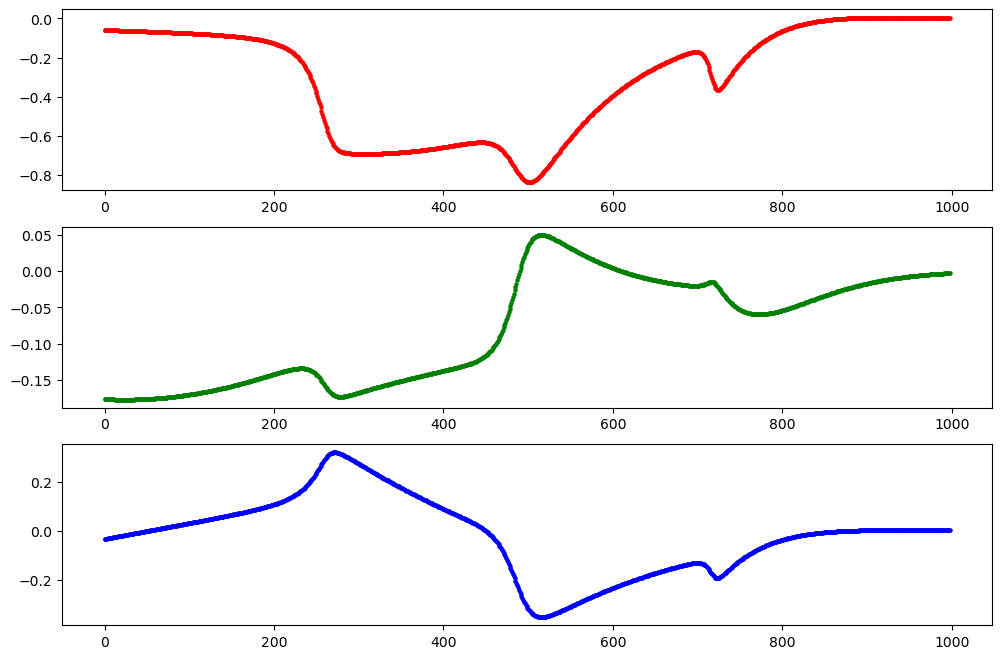

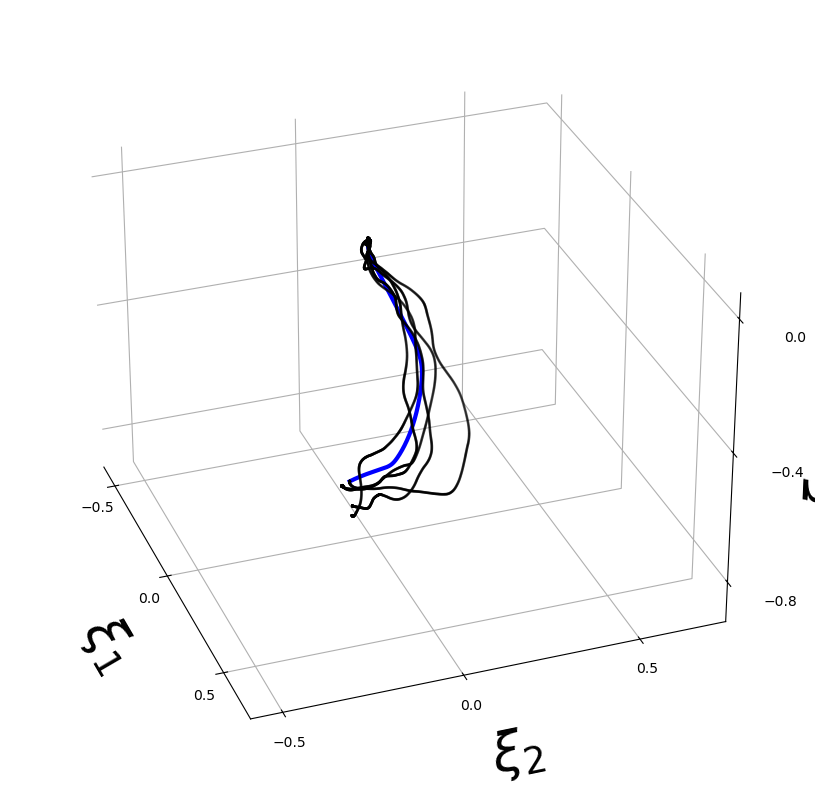

In [5]:
q_init = R.from_quat(q_init_list[0].as_quat())
q_test, gamma_test, omega_test = quat_obj.sim(q_init, step_size=dt, duration=T)

plot_tools.plot_traj(q_in_list, q_test)
plot_tools.plot_gmm(p_in, quat_obj.gmm)
plot_tools.plot_gamma(gamma_test)
plot_tools.plot_omega(omega_test)

plot_tools.plot_ds(q_in, q_test, q_att)

plt.show()